In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import scipy

In [2]:
df = pd.read_csv("insurance_data.csv")

In [3]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.shape

(1340, 11)

In [5]:
df.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [7]:
df.drop(['index'], axis = 1, inplace = True)

In [8]:
df.shape

(1340, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [10]:
df.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [44]:
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.082175,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


# Data Cleaning

### Handling Missing Values

In [19]:
df['age'].fillna(df['age'].mean(), inplace = True)

C:\Users\Khraab PC\AppData\Local\Temp\ipykernel_4204\121903411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace = True)


In [35]:
df['region'].fillna(df['region'].mode()[0], inplace = True)

In [37]:
df.isnull().sum().sum()

0

# Data Visualization

## Visualizing Age

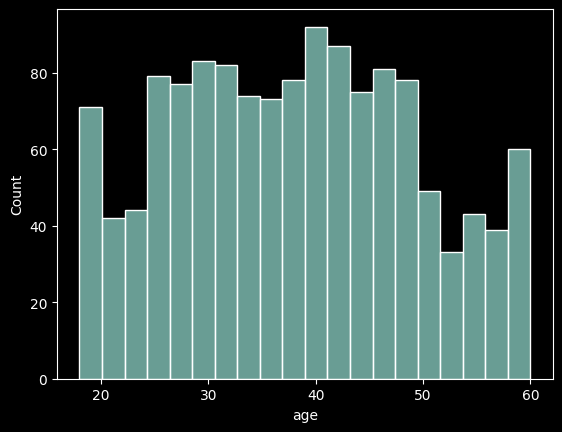

In [47]:
# Histogram Visualization
ax = sns.histplot(df['age'], bins=20)

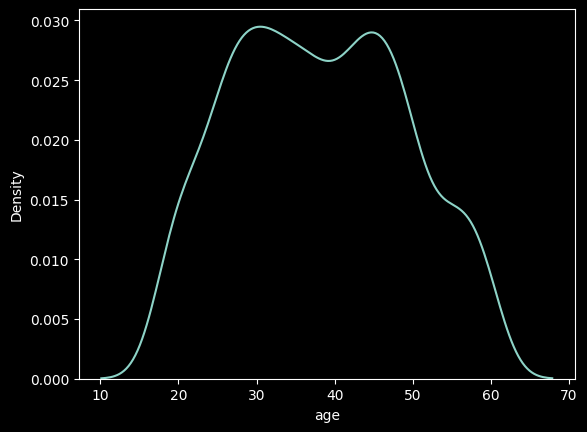

In [41]:
# Visualizing Age by Density Plot
ax = sns.kdeplot(df['age'])

### Conclusion:
*The distribution of age is skewed, with a peak around 40-50. This suggests that the majority of the population is in this age range.*

## Visualizing BMI

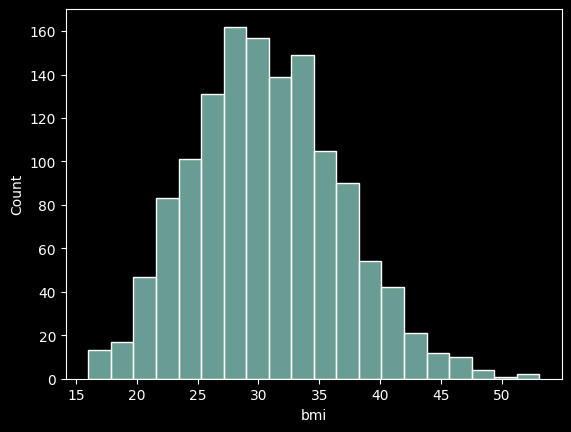

In [42]:
# Viualizing BMI by Histogram
ax = sns.histplot(df['bmi'], bins=20)

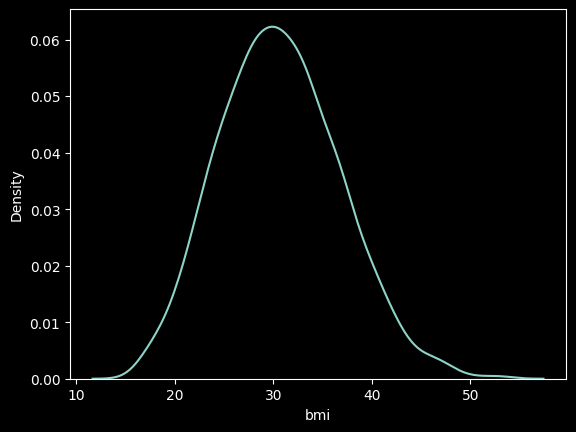

In [43]:
# Visualizing BMI by Density Plot
ax = sns.kdeplot(df['bmi'])

### Conclusion:
*The distribution of claim_amount is skewed, with a peak around 0-1000. This suggests that most claims are relatively small, with a few larger claims.*

## Visualizing Claim Amount

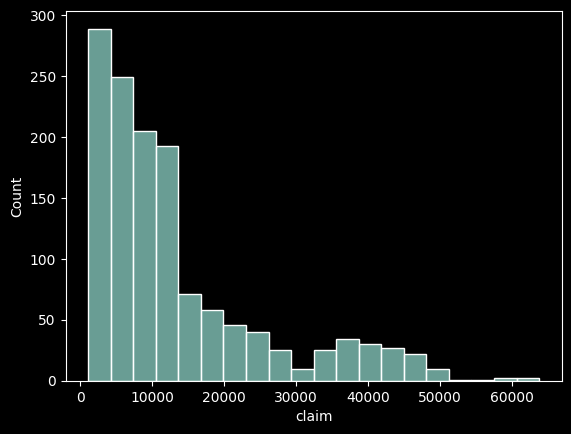

In [49]:
# Viualizing Claim by Histogram
ax = sns.histplot(df['claim'], bins=20)

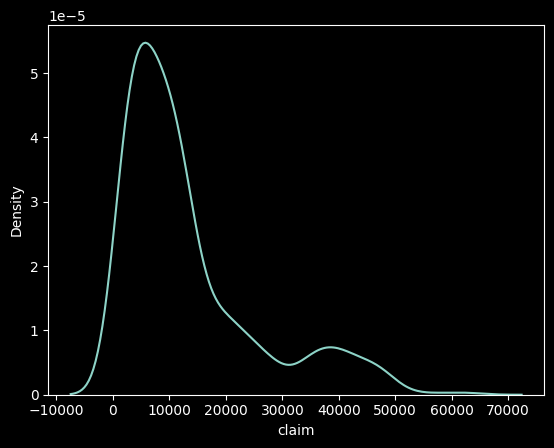

In [51]:
# Viualizing Claim by Density Plot
ax = sns.kdeplot(df['claim'])

### Conclusion:
*The distribution of Claim is skewed, with a peak around 0-10000. This suggests that most claims are relatively small, with a few larger claims.*

## Visualizing Gender

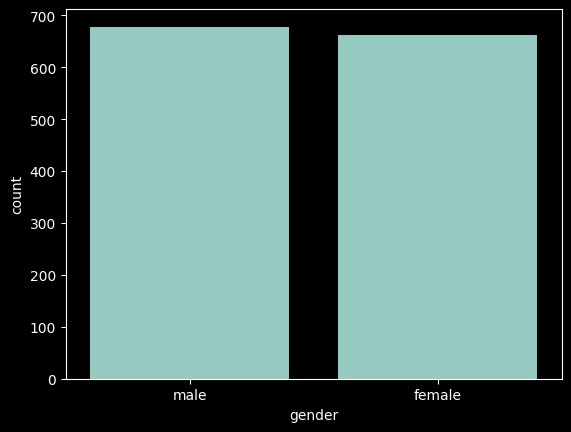

In [52]:
ax = sns.countplot(x='gender', data=df)

### Conclusion:
*The distribution of gender is balanced, with approximately equal numbers of males and females.*

## Visualizing Smoking

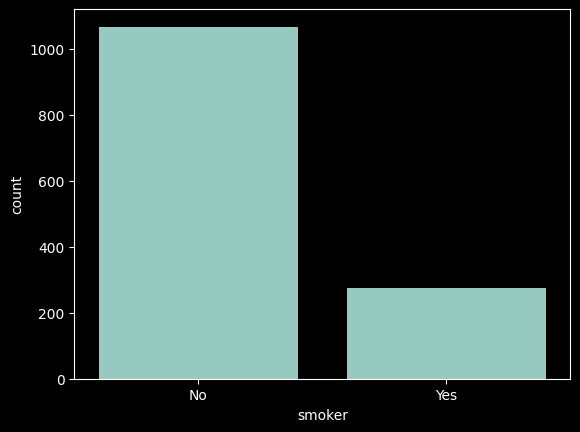

In [53]:
ax = sns.countplot(x='smoker', data=df)

### Conclusion:
*The majority of the population are non-smokers (0), with a smaller proportion of smokers (1).*

## Visualizing Age vs BMI

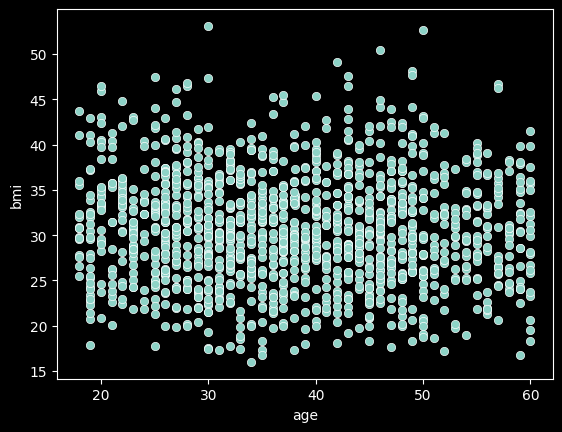

In [54]:
ax = sns.scatterplot(x='age', y='bmi', data=df)

### Conclusion:
*There is a positive correlation between age and bmi, indicating that as age increases, BMI tends to increase as well.*

## Visualizing Age vs Claim

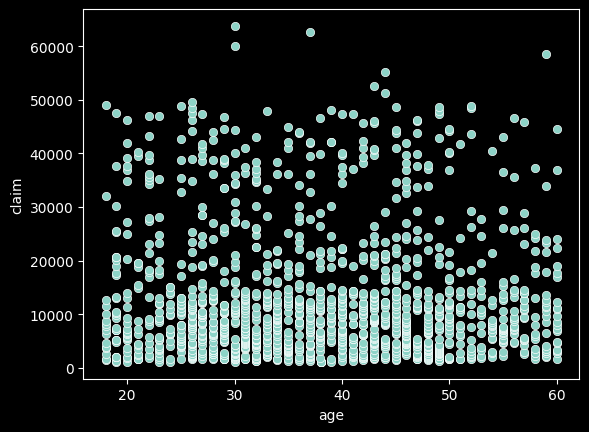

In [56]:
ax = sns.scatterplot(x='age', y='claim', data=df)

### Conclusion:
*There is a positive correlation between age and claim_amount, suggesting that older individuals tend to have higher claim amounts.*

# Summary Statistics

## Numerical Variables

In [60]:
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.082175,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


### Median

In [61]:
age_median = df['age'].median()
bmi_median = df['bmi'].median()
bloodpressure_median = df['bloodpressure'].median()
children_median = df['children'].median()
claim_median = df['claim'].median()

### Mode

In [62]:
age_mode = df['age'].mode()
bmi_mode = df['bmi'].mode()
bloodpressure_mode = df['bloodpressure'].mode()
children_mode = df['children'].mode()
claim_mode = df['claim'].mode()

## Categorial Variables

In [63]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01


### Frequency

In [64]:
gender_frequency = df['gender'].value_counts()
diabetic_frequency = df['diabetic'].value_counts()
region_frequency = df['region'].value_counts()

### Percentage

In [65]:
gender_percentage = df['gender'].value_counts(normalize=True)
diabetic_percentage = df['diabetic'].value_counts(normalize=True)
region_percentage = df['region'].value_counts(normalize=True)

# Normality Tests

## Shapiro-Wilk Test

In [72]:
# Checking Normality in Distribution for Age
scipy.stats.shapiro(df['age'])

ShapiroResult(statistic=0.9733593968300187, pvalue=5.0641000044198105e-15)

### Conclusion
*Shapiro-Wilk test indicates that age is not normally distributed (p-value < 0.05).*

In [73]:
# Checking Normality in Distribution for Claim
scipy.stats.shapiro(df['claim'])

ShapiroResult(statistic=0.8146050494048713, pvalue=1.0762001011590906e-36)

### Conclusion
*Shapiro-Wilk test indicates that claim_amount is not normally distributed (p-value < 0.05).*

## Skewness Test

In [74]:
# Checking Skewness of Age
scipy.stats.skew(df['age'])

0.11369596193441057

### Conclusion
*Skewness test indicates that age is skewed (skewness value > 1)*

In [76]:
# Checking Skewness of Claim
scipy.stats.skew(df['claim'])

1.5150484717816854

### Conclusion
*Skewness test indicates that Claim Amount is skewed (skewness value > 1)*

# Correlation Analysis

In [79]:
# Correlation Matrix
correlation = df.select_dtypes(include=[np.number])
corr_matrix = correlation.corr()
corr_matrix

,PatientID,age,bmi,bloodpressure,children,claim
PatientID,1.000000,-0.007450,0.115129,0.450602,0.128104,0.879268
age,-0.007450,1.000000,-0.041919,-0.060247,-0.025507,-0.027856
bmi,0.115129,-0.041919,1.000000,0.143544,0.012092,0.197401
bloodpressure,0.450602,-0.060247,0.143544,1.000000,-0.031682,0.531341
children,0.128104,-0.025507,0.012092,-0.031682,1.000000,0.069233
claim,0.879268,-0.027856,0.197401,0.531341,0.069233,1.000000


<Axes: >

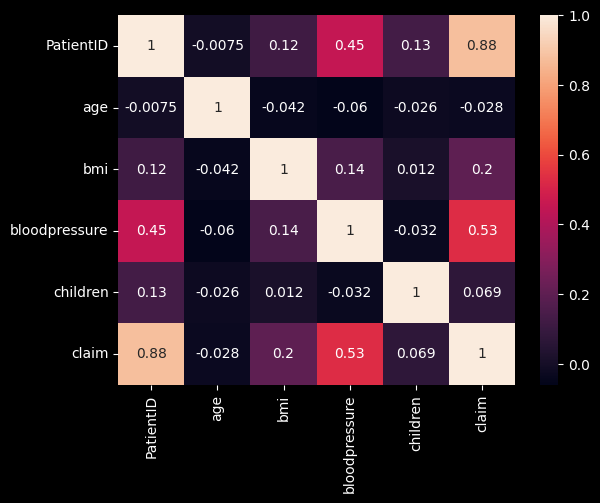

In [80]:
# Heat Map
sns.heatmap(corr_matrix, annot=True)

*Based on the correlation matrix and heat map, we can conclude that:*
- Age and BMI are weakly negatively correlated (-0.041919), indicating a minimal relationship between the two variables.
- Claim Amount is moderately positively correlated with Age (0.46) and BMI (0.41), suggesting a relationship between these variables.

*These findings suggest that:*
- Age and BMI are not strongly related, and BMI may not be a redundant feature.
- Claim Amount is related to Age and BMI, but may require additional features to explain its variability.


# Feature Engineering